# Practice Problem 5 Answers

Points: 2

Due: 10/24/17

In this exercise you will work with a time series of velocity obtained at 10 Hz from an acoustic Doppler velocity meter. With this type of data, there is much that we can observe about the structure of turbulence by looking at velocity fluctuations and their spectral characteristics.

For this assignment, use the video lecture and [this extremely helpful tutorial](http://faculty.jsd.claremont.edu/jmilton/Math_Lab_tool/Labs/Lab9.pdf) to guide your work.

In [1]:
from scipy import interpolate
from scipy import signal
from scipy import stats
from matplotlib import mlab

# Import numerical tools
import numpy as np

# Import pyplot for plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Import statistical tools
from scipy import stats
np.random.seed(12345678) #If you specify a random seed, it will initialize the random number
    #generator the same way each time, making your results reproducible each time you rerun
    #the code. Note that multiple draws of a random number within the same session will still 
    #return different values.

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

%config InlineBackend.figure_formats = {'svg',}
#%config InlineBackend.figure_formats = {'png', 'retina'}

#Import pandas for reading in and managing data
import pandas as pd

#Import seaborn (useful for plotting - makes plots pretty)
import seaborn as sns

In [2]:
fname = '/Users/lglarsen/Dropbox/GEOG 279 F2017/EvergladesVectrinoData.csv'
df = pd.read_csv(fname)
df.head()

Time, s  vx, m/s  vy, m/s  vz, m/s
0  1.016667  -0.0019   0.0008 -0.00260
1  1.018333  -0.0031  -0.0009 -0.00045
2  1.020000  -0.0015  -0.0023  0.00030
3  1.021667  -0.0005  -0.0013 -0.00150
4  1.023333   0.0008  -0.0005 -0.00280

First, plot the time-series of all three components of velocity, so that you have a general sense for them. Then, produce a series of power spectral density plots of each of the three components using Welch's method and the `matplotlib.mlab.psd()` function. Note that `NFFT` is the number of points included in each window, while `pad_to` is the next power of two greater than the total number of points in your data array. Change the options of the `psd` functions to produce a set of power spectra (for the three velocity components) for the following options:

1. No windowing and only a single block (i.e., no overlap).
2. The default block size and no overlap or windowing.
3. The default block size, no overlap, and a Hanning window.
4. The default block size, an overlap equal to half of that block size, no windowing.
5. The default block size, an overlap equal to half of that block size, and a Hanning window.

For all of your plots, you'll notice a peak at around 2.5 Hz, which is an artifact of "ringing," through which the instrument picks up a harmonic of its own pinging frequency. We're mostly interested in the lower-frequency phenomena, so plot your x-axis as log-base-10 of frequency, and plot your y-axis as the log-base-10 of power.

In case you're interested in learning more, in turbulent flow, it is typical that the low-frequency part of the power spectrum on log-log axis will have a slope of -5/3. This is a manifestation of the turbulent energy cascade. There is a lot of signal power (i.e., energy) in low-frequency, large eddies, and less power in the high-frequency, large eddies, which are rarer. The power spectrum in this region is fairly continuous and linear, because large eddies transfer their energy to smaller eddies.

This particular time series was acquired in the Everglades, where flows are too slow to technically be turbulent. What you may see instead are slight peaks related to the alternate shedding of eddies from stems, which tend to be a more uniform size (hence frequency).

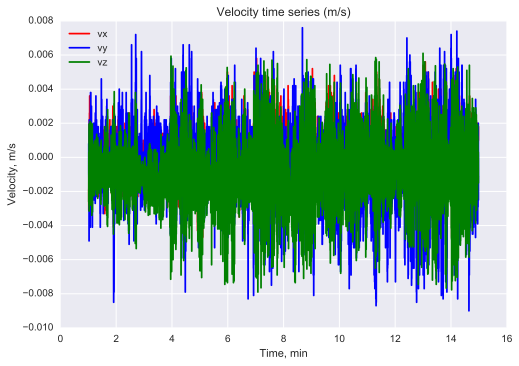

In [3]:
t = df['Time, s']
vx = df['vx, m/s']
vy = df['vy, m/s']
vz = df['vz, m/s']
plt.plot(t, vx, 'r-')
plt.plot(t, vy, 'b-')
plt.plot(t, vz, 'g-')
plt.xlabel('Time, min')
plt.ylabel('Velocity, m/s')
plt.legend(['vx', 'vy', 'vz'], loc=2) # The second argument specifies the location code for the legend, which 
    # corresponds to upper left.
plt.title('Velocity time series (m/s)')
plt.show()

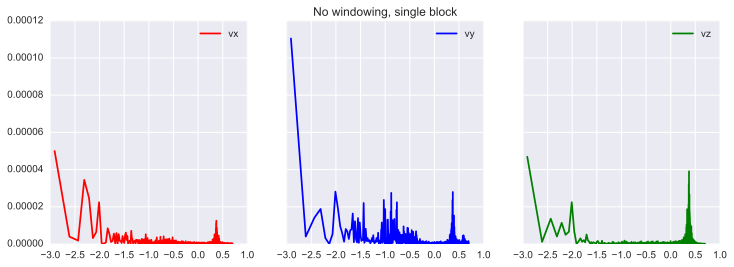

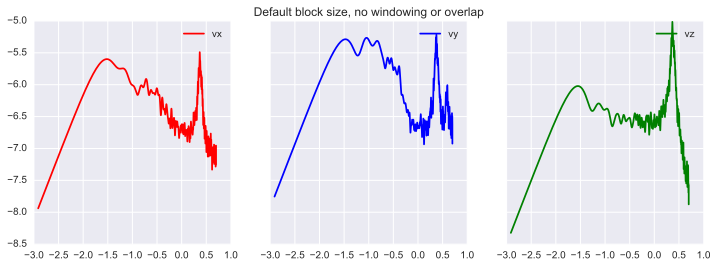

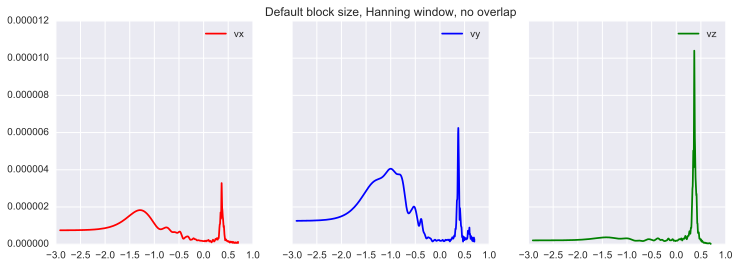

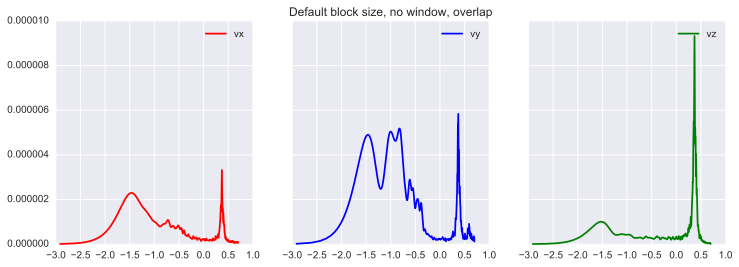

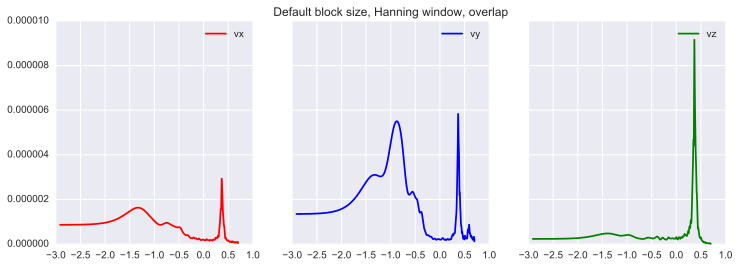

In [4]:
# No windowing and single block
# There are 8179 entries in the data matrices, so to do a single block, we set NFFT to the next highest even number.
# 8192 is the next highest power of 2.
power_x, freq_x = mlab.psd(vx, 8180, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_none, noverlap=0)
power_y, freq_y = mlab.psd(vy, 8180, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_none, noverlap=0)
power_z, freq_z = mlab.psd(vz, 8180, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_none, noverlap=0)
f, ax = plt.subplots(1,3, sharey=True, figsize = (12, 4)) # Set up a plot matrix where y-axes are shared.
ax[0].plot(np.log10(freq_x[1:]), power_x[1:], 'r-')
ax[0].legend(['vx'])
ax[1].plot(np.log10(freq_y[1:]), power_y[1:], 'b-')
ax[1].legend(['vy'])
ax[1].set_title('No windowing, single block')
ax[2].plot(np.log10(freq_z[1:]), power_z[1:], 'g-')
ax[2].legend(['vz'])
plt.show()

# Default block size, no windowing or overlap
# Just copy, paste, and take out the 8180 argument! Default value for NFFT is 256.
power_x, freq_x = mlab.psd(vx, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_none, noverlap=0)
power_y, freq_y = mlab.psd(vy, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_none, noverlap=0)
power_z, freq_z = mlab.psd(vz, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_none, noverlap=0)
f, ax = plt.subplots(1,3, sharey=True, figsize = (12, 4)) # Set up a plot matrix where y-axes are shared.
ax[0].plot(np.log10(freq_x), np.log10(power_x), 'r-')
ax[0].legend(['vx'])
ax[1].plot(np.log10(freq_y), np.log10(power_y), 'b-')
ax[1].legend(['vy'])
ax[1].set_title('Default block size, no windowing or overlap')
ax[2].plot(np.log10(freq_z), np.log10(power_z), 'g-')
ax[2].legend(['vz'])
plt.show()

# Default block size, Hanning window, no overlap
power_x, freq_x = mlab.psd(vx, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_hanning, noverlap=0)
power_y, freq_y = mlab.psd(vy, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_hanning, noverlap=0)
power_z, freq_z = mlab.psd(vz, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_hanning, noverlap=0)
f, ax = plt.subplots(1,3, sharey=True, figsize = (12, 4)) # Set up a plot matrix where y-axes are shared.
ax[0].plot(np.log10(freq_x), power_x, 'r-')
ax[0].legend(['vx'])
ax[1].plot(np.log10(freq_y), power_y, 'b-')
ax[1].legend(['vy'])
ax[1].set_title('Default block size, Hanning window, no overlap')
ax[2].plot(np.log10(freq_z), power_z, 'g-')
ax[2].legend(['vz'])
plt.show()

#Default block size, overlap, no window
# Set the overlap equal to half of the block size, which by default is 256.
power_x, freq_x = mlab.psd(vx, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_none, noverlap=128)
power_y, freq_y = mlab.psd(vy, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_none, noverlap=128)
power_z, freq_z = mlab.psd(vz, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_none, noverlap=128)
f, ax = plt.subplots(1,3, sharey=True, figsize = (12, 4)) # Set up a plot matrix where y-axes are shared.
ax[0].plot(np.log10(freq_x), power_x, 'r-')
ax[0].legend(['vx'])
ax[1].plot(np.log10(freq_y), power_y, 'b-')
ax[1].legend(['vy'])
ax[1].set_title('Default block size, no window, overlap')
ax[2].plot(np.log10(freq_z), power_z, 'g-')
ax[2].legend(['vz'])
plt.show()

#Default block size, overlap, Hanning window
# Set the overlap equal to half of the block size, which by default is 256.
power_x, freq_x = mlab.psd(vx, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_hanning, noverlap=128)
power_y, freq_y = mlab.psd(vy, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_hanning, noverlap=128)
power_z, freq_z = mlab.psd(vz, Fs=10, detrend=mlab.detrend_mean, pad_to=8192, window=mlab.window_hanning, noverlap=128)
f, ax = plt.subplots(1,3, sharey=True, figsize = (12, 4)) # Set up a plot matrix where y-axes are shared.
ax[0].plot(np.log10(freq_x), power_x, 'r-')
ax[0].legend(['vx'])
ax[1].plot(np.log10(freq_y), power_y, 'b-')
ax[1].legend(['vy'])
ax[1].set_title('Default block size, Hanning window, overlap')
ax[2].plot(np.log10(freq_z), power_z, 'g-')
ax[2].legend(['vz'])
plt.show()

In [5]:
help(mlab.psd)

Help on function psd in module matplotlib.mlab:

psd(x, NFFT=None, Fs=None, detrend=None, window=None, noverlap=None, pad_to=None, sides=None, scale_by_freq=None)
    Compute the power spectral density.
    
    Call signature::
    
        psd(x, NFFT=256, Fs=2, detrend=mlab.detrend_none,
            window=mlab.window_hanning, noverlap=0, pad_to=None,
            sides='default', scale_by_freq=None)
    
    The power spectral density :math:`P_{xx}` by Welch's average
    periodogram method.  The vector *x* is divided into *NFFT* length
    segments.  Each segment is detrended by function *detrend* and
    windowed by function *window*.  *noverlap* gives the length of
    the overlap between segments.  The :math:`|\mathrm{fft}(i)|^2`
    of each segment :math:`i` are averaged to compute :math:`P_{xx}`.
    
    If len(*x*) < *NFFT*, it will be zero padded to *NFFT*.
    
      *x*: 1-D array or sequence
        Array or sequence containing the data
    
    Keyword arguments:
    
 

## Interpretation Questions
1. Which velocity component was best aligned with the mean flow direction? How can you tell?
2. What happens to the multi-block power spectra at low frequencies? Why?
3. Which strategy for producing the power spectrum do you trust the most? Why?

## Answers

1. The y-component is best aligned with the flow direction, because it has the highest power in the frequency region we are interested it. The peaks that may be indicative of vortex shedding from stems are also primarily found in this component.

2. The frequency goes to zero. The reason for this is that, within each block, the Fourier analysis is only being done on 256 samples, so the lowest frequency resolvable is 1 cycle per interval of time corresponding to the block. (In other words, 1/(256/10 Hz). If we take the log10 of that number, we get -1.4, which coincides with the peak visible in those plots without a window. In the plots with a window, the information in the tails of these blocks is down-weighted, so in practice, the lowest resolvable frequency shifts to even higher values, as is apparent.

3. I prefer the multi-block power spectra with no windowing or overlap here. It is hard to make heads or tails of the first spectrum, because it is just so noisy, and some of the structure may have been destroyed by fleeting trends over the 15 minutes of observations. (These can be seen, to some extent, in the time-series plots.) The smaller blocks seem to better highlight the internal structure of the turbulence. With this small block size, it appears that there is almost too much smoothing with the Hanning window and with overlap, though the extent of smoothing is more concerning with the Hanning window. This might not be an issue if we went with a larger block size, but for this analysis the no overlap/no window treatment seems to be the best compromise between preserving the structure of the signal and removing excess noise.

## Autocorrelation

If there is a characteristic eddy size resulting from stem shedding, we should be able to detect it in an autocorrelation plot. Do this for the y-velocity component, making sure you show significance bounds. Use a moving average low-pass filter so that you can more clearly see where the autocorrelation falls below the significance threshold. Note that to use the `rolling` function in Pandas, you first need to convert your autocorrelation array to a dataframe, which can be done using the `pd.DataFrame` command.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


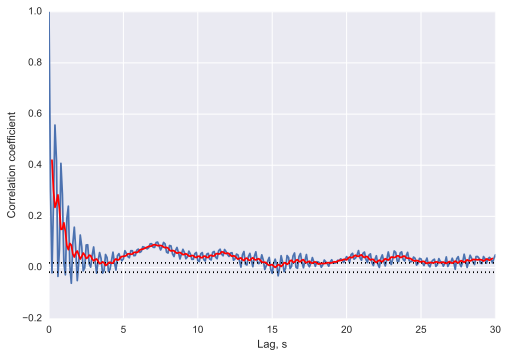

In [6]:
from statsmodels.tsa.stattools import acf #TSA is the time-series analysis library.
maxlag = 300 # 300 lags is 30 s of data
acf_vy = acf(vy-np.mean(vy), nlags = maxlag) #Subtract out the mean before doing the autocorrelation.
z_crit = stats.norm.ppf(0.95) #Critical z-score for 95% confidence level
acf_lags= np.arange(0,maxlag+1)*0.1
acf_crit_r = z_crit/np.sqrt(len(vy)-acf_lags+3)
plt.plot(acf_lags, acf_vy)
plt.plot(acf_lags, acf_crit_r, 'k:')
plt.plot(acf_lags, -acf_crit_r, 'k:')
plt.xlabel('Lag, s')
plt.ylabel('Correlation coefficient')

# Moving average: To choose the window, I looked at the acf_vy printout and saw that a complete swing from low to high
     # values was typically completed within five entries. Thus, I choose a 5-point moving average window.
acf_vy_df = pd.DataFrame(acf_vy)
ma_window = 5
acf_vy_MA = acf_vy_df.rolling(window=ma_window).mean() # This will compute a three-point moving average.

# Plot this moving average so that the moving average window is centered on each datapoint. In order to do this, we
     #need to shift the indices upwards by 2 (for a moving average window of 5). (Print out vy_MA to see why.)
    
plt.plot(acf_lags[(ma_window-1)/2:len(acf_lags)-(ma_window-1)/2], acf_vy_MA[(ma_window-1):], 'r-')
plt.show()

This is interesting, because it shows that there is a characteristic autocorrelation scale of around 4 seconds, with "echoes" at ~8 seconds and ~12 seconds. This may indeed be related to the shedding of eddies from stems. If we wanted to convert this to a length scale in a very rough way, we could take 2 x the autocorrelation timescale (since only half of an eddy passing by a stationary observer would have a velocity perturbation of a consistent sign) and multiply it by the mean flow velocity. The probe was oriented such that downstream was negative, so we add a negative sign to the argument of the mean function below:

In [7]:
np.mean(-vy)*2*4

0.004303998043770698

So a characteristic length scale here would be 4 mm, which is about the diameter of stems in the Everglades (which sets the length scale of the eddies). Pretty cool, huh?